# 简单图表示例

## 一、简单图表

如下功能和方法在该示例中展现: 
    
~~~python
matplotlib.axes.Axes.plot
matplotlib.pyplot.plot
matplotlib.pyplot.subplots
matplotlib.figure.Figure.savefig
~~~

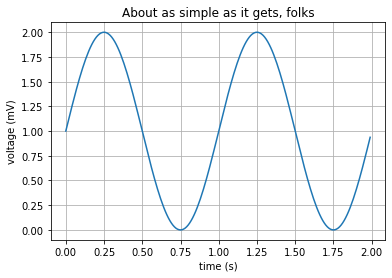

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

## 二、多图表

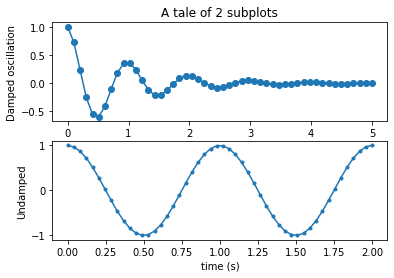

In [6]:
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## 三、位图

在Matplotlib中绘制图像的多种方法。

在Matplotlib中绘制图像的最常见方法是使用imshow()。 

以下示例演示了imshow的许多功能以及可以创建的许多图像。

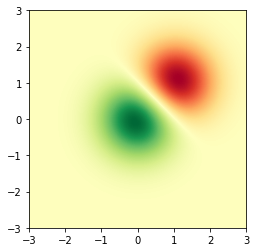

In [7]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())

plt.show()

### 加载位图

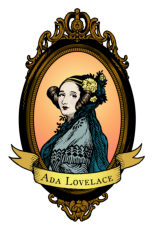

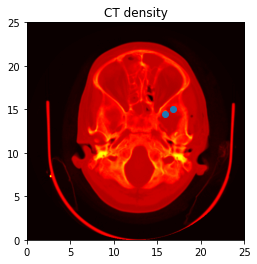

In [8]:
# A sample image
with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis


# And another image

w, h = 512, 512

with cbook.get_sample_data('ct.raw.gz') as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
A /= A.max()

fig, ax = plt.subplots()
extent = (0, 25, 0, 25)
im = ax.imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)

markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax.plot(x, y, 'o')

ax.set_title('CT density')

plt.show()


## 四、轮廓和伪色

即使水平尺寸的间距不均匀，pcolormesh()函数也可以对二维数组进行彩色显示。 outline()函数是表示相同数据的另一种方式：

下面示例显示如何结合使用Normalization和Colormap实例在pcolor()，pcolormesh()和imshow()类型图中绘制“级别”，其方式与轮廓/轮廓的level关键字参数类似。

用到如下功能: 

~~~python 
matplotlib.axes.Axes.pcolormesh
matplotlib.pyplot.pcolormesh
matplotlib.axes.Axes.contourf
matplotlib.pyplot.contourf
matplotlib.figure.Figure.colorbar
matplotlib.pyplot.colorbar
matplotlib.colors.BoundaryNorm
matplotlib.ticker.MaxNLocator
~~~

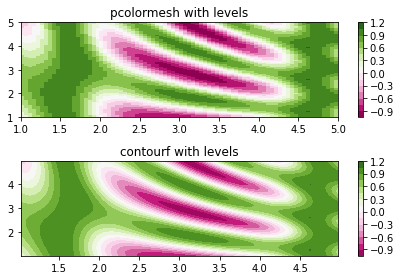

In [9]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

## 五、直方图

hist() 函数自动生成直方图，并返回bin计数或概率：

除了基本的直方图，此演示还显示了一些可选功能：

 - 设置数据仓的数量。
 - 标准化标志，用于标准化箱高度，以使直方图的积分为1。结果直方图是概率密度函数的近似值。
 - 设置条形的前景颜色。
 - 设置不透明度（alpha值）。

选择不同的箱数和大小会严重影响直方图的形状。 Astropy文档对如何选择这些参数进行了详细介绍。

用到如下内容: 

~~~python 
matplotlib.axes.Axes.hist
matplotlib.axes.Axes.set_title
matplotlib.axes.Axes.set_xlabel
matplotlib.axes.Axes.set_ylabel
~~~

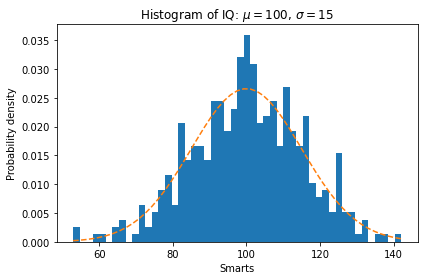

In [11]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## 六、路径

使用`Path`和`PathPatch`对象

~~~python
import matplotlib
matplotlib.path
matplotlib.path.Path
matplotlib.patches
matplotlib.patches.PathPatch
matplotlib.axes.Axes.add_patch
~~~

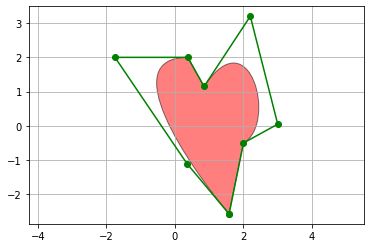

In [14]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

## 七、三维表面颜色图

演示绘制以coolwarm颜色图着色的3D表面。 通过使用antialiased = False使该表面不透明。

还演示了对z轴刻度标签使用LinearLocator和自定义格式。

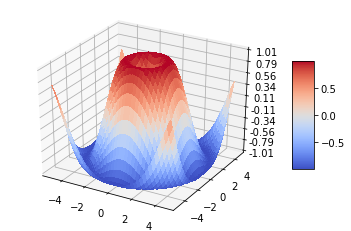

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## 八、流体图表

流图或流线图用于显示2D矢量场。 此示例显示了streamplot()函数的一些功能：

 - 沿流线变化颜色。
 - 改变流线的密度。
 - 沿流线改变线宽。
 - 控制流线的起点。
 - 精简跳过跳过的区域和NaN值。
 
 用到如下功能:
 
 ~~~python
import matplotlib
matplotlib.axes.Axes.streamplot
matplotlib.pyplot.streamplot
matplotlib.gridspec
matplotlib.gridspec.GridSpec
~~~

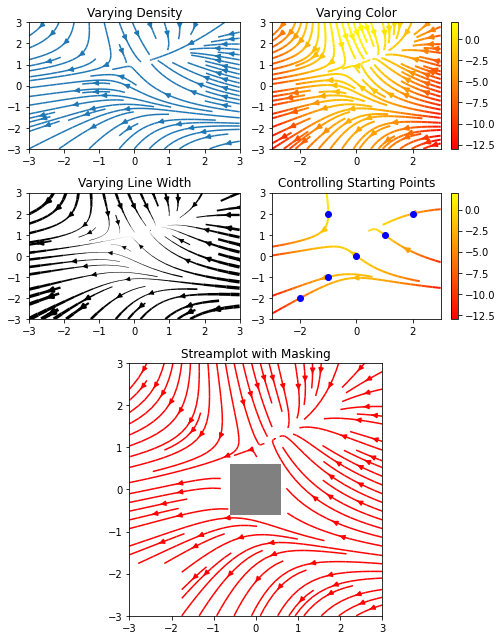

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

w = 3
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 2])

#  Varying density along a streamline
ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
ax0.set_title('Varying Density')

# Varying color along a streamline
ax1 = fig.add_subplot(gs[0, 1])
strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='autumn')
fig.colorbar(strm.lines)
ax1.set_title('Varying Color')

#  Varying line width along a streamline
ax2 = fig.add_subplot(gs[1, 0])
lw = 5*speed / speed.max()
ax2.streamplot(X, Y, U, V, density=0.6, color='k', linewidth=lw)
ax2.set_title('Varying Line Width')

# Controlling the starting points of the streamlines
seed_points = np.array([[-2, -1, 0, 1, 2, -1], [-2, -1,  0, 1, 2, 2]])

ax3 = fig.add_subplot(gs[1, 1])
strm = ax3.streamplot(X, Y, U, V, color=U, linewidth=2,
                     cmap='autumn', start_points=seed_points.T)
fig.colorbar(strm.lines)
ax3.set_title('Controlling Starting Points')

# Displaying the starting points with blue symbols.
ax3.plot(seed_points[0], seed_points[1], 'bo')
ax3.set(xlim=(-w, w), ylim=(-w, w))

# Create a mask
mask = np.zeros(U.shape, dtype=bool)
mask[40:60, 40:60] = True
U[:20, :20] = np.nan
U = np.ma.array(U, mask=mask)

ax4 = fig.add_subplot(gs[2:, :])
ax4.streamplot(X, Y, U, V, color='r')
ax4.set_title('Streamplot with Masking')

ax4.imshow(~mask, extent=(-w, w, -w, w), alpha=0.5,
          interpolation='nearest', cmap='gray', aspect='auto')
ax4.set_aspect('equal')

plt.tight_layout()
plt.show()


## 九、椭圆

画很多椭圆。 在此绘制单个椭圆。 

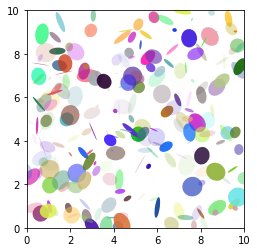

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 250

ells = [Ellipse(xy=np.random.rand(2) * 10,
                width=np.random.rand(), height=np.random.rand(),
                angle=np.random.rand() * 360)
        for i in range(NUM)]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))

ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

plt.show()

## 十、柱状图

百分数作为水平条形图

条形图对于可视化计数或带有错误条的摘要统计信息很有用。 另请参见带有标签的分组条形图或水平条形图示例，以获取这些功能的简单版本。

此示例来自一个应用程序，该应用程序中的小学体育教师希望能够向父母展示他们的孩子在进行几次体能测试后的表现，重要的是，相对于其他孩子的表现。 为了提取绘图代码以进行演示，我们将为小约翰尼·杜（Johnny Doe）整理一些数据。

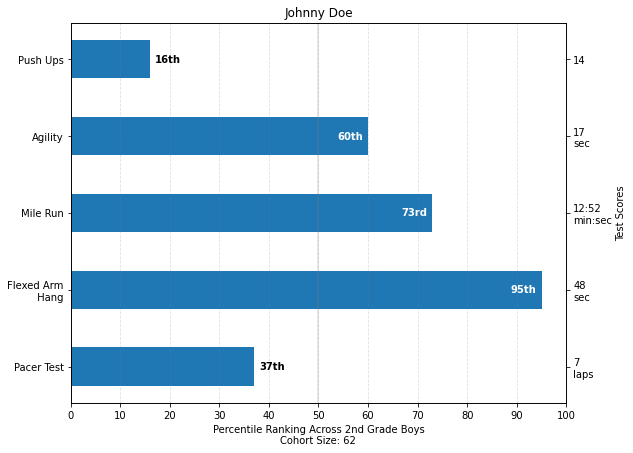

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_meta = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs. 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = test_meta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    scoreLabels = [format_score(scores[k].score, k) for k in test_names]

    # set the tick locations
    ax2.set_yticks(pos)
    # make sure that the limits are set equally on both yaxis so the
    # ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # set the tick labels
    ax2.set_yticklabels(scoreLabels)

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rankStr = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

## 十一、饼图

基本饼图

基本饼图演示以及一些其他功能。

除了基本的饼图，此演示还显示了一些可选功能：

- 切片标签
- 自动标记百分比
- 用“爆炸”偏移切片
- 阴影
- 自定义起始角度

关于自定义起始角度的注意事项：

默认起始角度为0，它将在正x轴上开始“青蛙”切片。 本示例将startangle = 90设置为使所有内容都逆时针旋转90度，并且青蛙切片从y轴正方向开始。

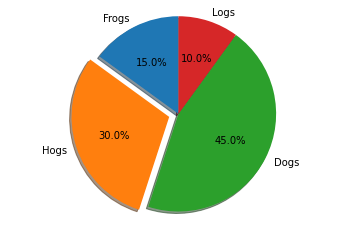

In [19]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 十二、表

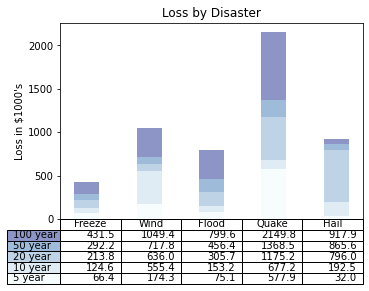

In [20]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

## 十三、散点图

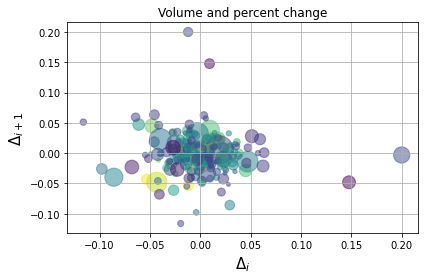

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

## 十四、GUI装饰

滑块演示

使用滑块小部件来控制绘图的视觉属性。

在此示例中，使用滑块选择正弦波的频率。 您可以通过这种方式控制绘图的许多连续变化的属性。

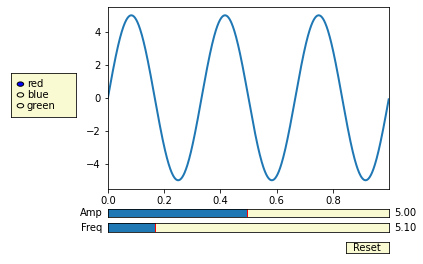

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()


## 十五、填充曲线

fill()基于点坐标x，y的列表绘制填充的多边形。

本示例使用科赫雪花作为示例多边形。

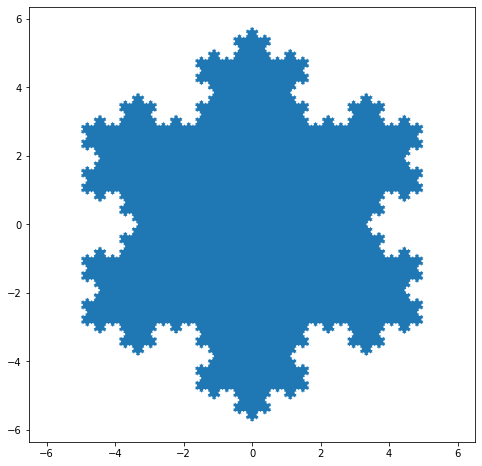

In [28]:
import numpy as np
import matplotlib.pyplot as plt


def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Arguments
    ---------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2
            return new_points

    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)

plt.figure(figsize=(8, 8))
plt.axis('equal')
plt.fill(x, y)
plt.show()


使用关键字参数facecolor和edgecolor修改多边形的颜色。 

由于在默认的Matplotlib样式中，边缘的线宽为0，因此我们也必须对其进行设置，以使边缘变得可见。

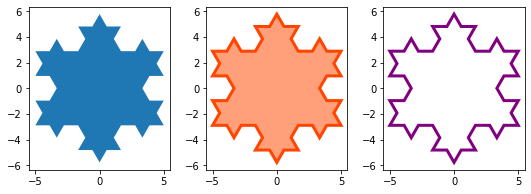

In [29]:
x, y = koch_snowflake(order=2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3),
                                    subplot_kw={'aspect': 'equal'})
ax1.fill(x, y)
ax2.fill(x, y, facecolor='lightsalmon', edgecolor='orangered', linewidth=3)
ax3.fill(x, y, facecolor='none', edgecolor='purple', linewidth=3)

plt.show()

## 十六、时间抓取

日期刻度标签

显示如何使用日期刻度定位符和格式化程序在Matplotlib中进行日期绘图。 有关控制主要和次要价格变动的更多信息，请参见主要和次要价格变动。

所有matplotlib日期绘图都是通过将日期实例转换为自0001-01-01 00:00:00 UTC加上1天（出于历史原因）以来的天数来完成的。 转换，刻度线定位和格式化是在幕后完成的，因此这对您最透明。 date模块提供了几个转换器函数matplotlib.dates.date2num和matplotlib.dates.num2date。 这些可以在datetime.datetime对象和numpy.datetime64对象之间转换。

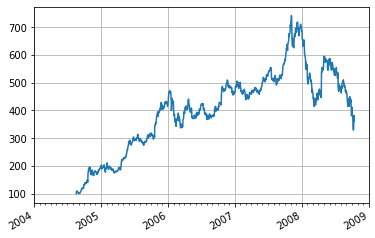

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
with cbook.get_sample_data('goog.npz') as datafile:
    data = np.load(datafile)['price_data']

fig, ax = plt.subplots()
ax.plot('date', 'adj_close', data=data)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years.
datemin = np.datetime64(data['date'][0], 'Y')
datemax = np.datetime64(data['date'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()


## 十七、对数图


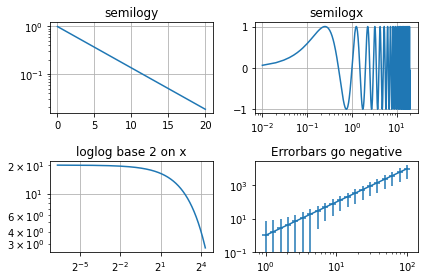

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()


## 十八、极坐标图

极坐标系上的一条直线示例

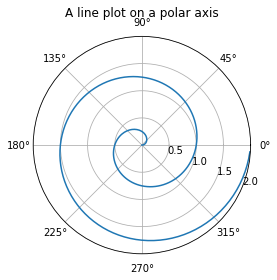

In [27]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

## 十九、图例

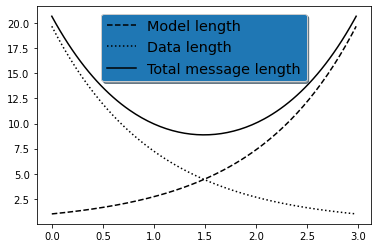

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

## 二十、文本对象的TeX表示法

数学TeX示例

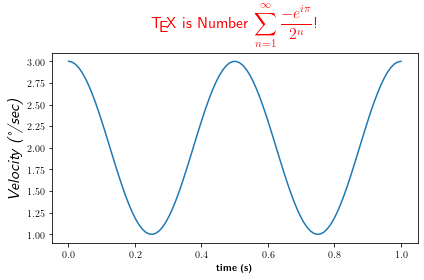

In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')
plt.show()

In [76]:
import matplotlib.pyplot as plt
import subprocess
import sys
import re
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rcParams['text.usetex']=True
# matplotlib.rcParams['text.latex.unicode']=True

# Selection of features following "Writing mathematical expressions" tutorial
mathtext_titles = {
    0: "Header demo",
    1: "Subscripts and superscripts",
    2: "Fractions, binomials and stacked numbers",
    3: "Radicals",
    4: "Fonts",
    5: "Accents",
    6: "Greek, Hebrew",
    7: "Delimiters, functions and Symbols"
}
n_lines = len(mathtext_titles)

# Randomly picked examples
mathext_demos = {
    0: r"$W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = "
    r"U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} "
    r"\int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ "
    r"U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_"
    r"{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$",

    1: r"$\alpha_i > \beta_i,\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ldots$",

    2: r"$\frac{3}{4},\left(\frac{5 - \frac{1}{x}}{4}\right),\ldots$",
    
    # 无法编译: ,\binom{3}{4},\genfrac{}{}{0}{}{3}{4}

    3: r"$\sqrt{2},\sqrt[3]{x},\ldots$",

    4: r"$\mathrm{Roman}\ , \mathit{Italic}\ , \mathtt{Typewriter}\ \mathrm{or}\ \mathcal{CALLIGRAPHY}$",

    5: r"$\acute a,\bar a,\breve a,\dot a,\ddot a, \grave a, \hat a,\tilde a,\vec a,\widehat{xyz},\widetilde{xyz},\ldots$",

    6: r"$\alpha,\beta,\chi,\delta,\lambda,\mu,\Delta,\Gamma,\Omega,\Phi,\Pi,\Upsilon,\nabla,\aleph,\ldots$",
    # 无法编译: ,\beth,\daleth,\gimel
    7: r"$\coprod,\int,\oint,\prod,\sum,\log,\sin,\approx,\oplus,\star,\infty,\partial,\Re,\ldots$"
    # 无法编译: \varpropto,\leftrightsquigarrow,
}

def doall():
    # Colors used in Matplotlib online documentation.
    mpl_blue_rvb = (191. / 255., 209. / 256., 212. / 255.)
    mpl_orange_rvb = (202. / 255., 121. / 256., 0. / 255.)
    mpl_grey_rvb = (51. / 255., 51. / 255., 51. / 255.)

    # Creating figure and axis.
    plt.figure(figsize=(6, 9))
    plt.axes([0.01, 0.01, 0.98, 0.90], facecolor="white", frameon=True)
    plt.gca().set_xlim(0., 1.)
    plt.gca().set_ylim(0., 1.)
    plt.gca().set_title("Matplotlib's math rendering engine",
                        color=mpl_grey_rvb, fontsize=14, weight='bold')
    plt.gca().set_xticklabels("", visible=False)
    plt.gca().set_yticklabels("", visible=False)

    # Gap between lines in axes coords
    line_axesfrac = (1. / (n_lines))

    # Plotting header demonstration formula
    full_demo = mathext_demos[0]
    plt.annotate(full_demo,
                 xy=(0.5, 1. - 0.59 * line_axesfrac),
                 color=mpl_orange_rvb, ha='center', fontsize=20)

    # Plotting features demonstration formulae
    for i_line in range(1, n_lines):
        baseline = 1 - (i_line) * line_axesfrac
        baseline_next = baseline - line_axesfrac
        title = mathtext_titles[i_line] + ":"
        fill_color = ['white', mpl_blue_rvb][i_line % 2]
        plt.fill_between([0., 1.], [baseline, baseline],
                         [baseline_next, baseline_next],
                         color=fill_color, alpha=0.5)
        plt.annotate(title,
                     xy=(0.07, baseline - 0.3 * line_axesfrac),
                     color=mpl_grey_rvb, weight='bold')
        demo = mathext_demos[i_line]
        plt.annotate(demo,
                     xy=(0.05, baseline - 0.75 * line_axesfrac),
                     color=mpl_grey_rvb, fontsize=16)

    for i in range(n_lines):
        s = mathext_demos[i]
        print(i, s)
    plt.show()


# if '--latex' in sys.argv:
#     # Run: python mathtext_examples.py --latex
#     # Need amsmath and amssymb packages.
#     fd = open("mathtext_examples.ltx", "w")
#     fd.write("\\documentclass{article}\n")
#     fd.write("\\usepackage{amsmath, amssymb}\n")
#     fd.write("\\begin{document}\n")
#     fd.write("\\begin{enumerate}\n")

#     for i in range(n_lines):
#         s = mathext_demos[i]
#         s = re.sub(r"(?<!\\)\$", "$$", s)
#         fd.write("\\item %s\n" % s)

#     fd.write("\\end{enumerate}\n")
#     fd.write("\\end{document}\n")
#     fd.close()

#     subprocess.call(["pdflatex", "mathtext_examples.ltx"])
# else:
doall()

0 $W^{3\beta}_{\delta_1 \rho_1 \sigma_2} = U^{3\beta}_{\delta_1 \rho_1} + \frac{1}{8 \pi 2} \int^{\alpha_2}_{\alpha_2} d \alpha^\prime_2 \left[\frac{ U^{2\beta}_{\delta_1 \rho_1} - \alpha^\prime_2U^{1\beta}_{\rho_1 \sigma_2} }{U^{0\beta}_{\rho_1 \sigma_2}}\right]$
1 $\alpha_i > \beta_i,\alpha_{i+1}^j = {\rm sin}(2\pi f_j t_i) e^{-5 t_i/\tau},\ldots$
2 $\frac{3}{4},\genfrac{}{}{0}{}{3}{4},\left(\frac{5 - \frac{1}{x}}{4}\right),\ldots$
3 $\sqrt{2},\sqrt[3]{x},\ldots$
4 $\mathrm{Roman}\ , \mathit{Italic}\ , \mathtt{Typewriter}\ \mathrm{or}\ \mathcal{CALLIGRAPHY}$
5 $\acute a,\bar a,\breve a,\dot a,\ddot a, \grave a, \hat a,\tilde a,\vec a,\widehat{xyz},\widetilde{xyz},\ldots$
6 $\alpha,\beta,\chi,\delta,\lambda,\mu,\Delta,\Gamma,\Omega,\Phi,\Pi,\Upsilon,\nabla,\aleph,\ldots$
7 $\coprod,\int,\oint,\prod,\sum,\log,\sin,\approx,\oplus,\star,\infty,\partial,\Re,\ldots$


RuntimeError: latex was not able to process the following string:
b'$\\\\frac{3}{4},\\\\genfrac{}{}{0}{}{3}{4},\\\\left(\\\\frac{5 - \\\\frac{1}{x}}{4}\\\\right),\\\\ldots$'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(/home/tlw/.cache/matplotlib/tex.cache/4284b8540bb783eb1797f25fb8886cf2.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2020/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/mathpazo.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/helvet.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/graphics/keyval.sty))
(/usr/local/texlive/2020/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2020/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2020/texmf-dist/tex/generic/iftex/iftex.sty))

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/usr/local/texlive/2020/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file 4284b8540bb783eb1797f25fb8886cf2.aux.
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1ppl.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1phv.fd

LaTeX Warning: Font shape declaration has incorrect series value `mc'.
               It should not contain an `m'! Please correct it.
               Found on input line 21.


LaTeX Warning: Font shape declaration has incorrect series value `mc'.
               It should not contain an `m'! Please correct it.
               Found on input line 24.


LaTeX Warning: Font shape declaration has incorrect series value `mc'.
               It should not contain an `m'! Please correct it.
               Found on input line 27.


LaTeX Warning: Font shape declaration has incorrect series value `mc'.
               It should not contain an `m'! Please correct it.
               Found on input line 47.

) (/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omlzplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omszplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/omxzplm.fd)
(/usr/local/texlive/2020/texmf-dist/tex/latex/psnfss/ot1zplm.fd)
! Undefined control sequence.
l.14 ...20.000000}{\sffamily $\frac{3}{4},\genfrac
                                                  {}{}{0}{}{3}{4},\left(\fra...
No pages of output.
Transcript written on 4284b8540bb783eb1797f25fb8886cf2.log.




<Figure size 432x648 with 1 Axes>

In [4]:
## 二十一、内置的TeX渲染

使用TeX渲染数学方程式

如果设置了rc参数text.usetex，则可以使用TeX渲染所有matplotlib文本。 

这目前在agg和ps后端上有效，并且要求您具有tex以及在系统上正确安装的“使用LaTeX渲染文本”教程中描述的其他依赖项。 

第一次运行脚本时，您会看到tex和相关工具的大量输出。 下次，由于很多信息被缓存，运行可能会保持沉默。

请注意，如何使用unicode提供y轴的标签！

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x288 with 1 Axes>

## 二十二、EEG GUI

更多详细信息参考原文

## 二十三、XKCD风格草图

创建类似xkcd的图表

In [35]:
import matplotlib.pyplot as plt
import numpy as np
with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Munroe
    # https://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    ax.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    ax.plot(data)

    ax.set_xlabel('time')
    ax.set_ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Munroe',
        ha='center')

RuntimeError: xkcd mode is not compatible with text.usetex = True

## 二十四、子图示例
可以将许多绘图类型组合到一个图中，以创建功能强大且灵活的数据表示形式。

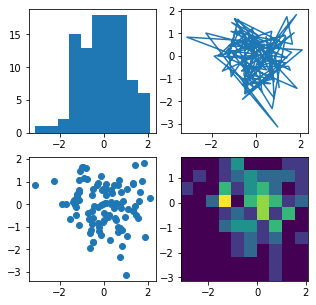

In [12]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()